# Day 2

## Machine Learning

How can we get machines to ‘understand’, and therefore speak usefully about data?


### Regression

- If we have some input data points and some ‘answers’ to go with them (training data), what will the answers be for future inputs?
- Linear regression is for finding the line of best fit
    - The straight line which best predicts answers – hopefully including future ones!
- Can be extended – we could also find a curve of best fit if we use a more complicated equation than a straight line


### Linear Regression
$y = w_0 + w_1x + \varepsilon$<br>
One predictor (feature): $x$ <br> + <br> One target (response): $y$ <br> = <br> Two dimensions

Linear regression learns parameters of a straight line:
one intercept ($𝑤_0$) and a slope ($𝑤_1, …$) for each feature

Model parameters: intercept=-1.081677685977052, coefficient1=2.111090659580595, coefficient2=3.099706071403826


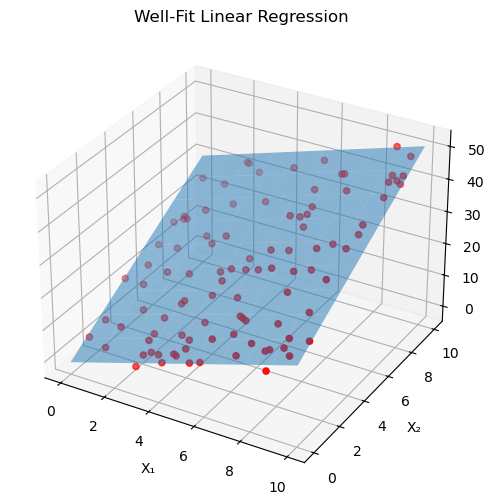

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# np.random.seed(42)

# Generate data
X = np.random.rand(100, 2) * 10
Y = 2 * X[:,0] + 3 * X[:,1] + np.random.normal(0, 2, 100)

# Train model
model = LinearRegression().fit(X, Y)

# Create meshgrid
xx, yy = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))
zz = model.intercept_ + model.coef_[0]*xx + model.coef_[1]*yy

print(f"Model parameters: intercept={model.intercept_}, coefficient1={model.coef_[0]}, coefficient2={model.coef_[1]}")

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='o')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.set_xlabel('X₁'), ax.set_ylabel('X₂'), ax.set_zlabel('Y')
plt.title('Well-Fit Linear Regression')
plt.show()

### Classification

- If we have some input data and some ‘answers’ – and this time the answers are discrete (as opposed to continuous) – what will the answers be for future inputs?
    - E.g.: which manufacturer made the car in this image?
- Logistic regression is commonly used to predict probabilities which we can use to classify (binary classification but can be extended)

Other GRC courses will/have covered linear and logistic regression. However, examples are included in the worksheets for your interest


### Logistic Regression

$log(\frac{y}{1-y}) = w_0 + w_1x$ <br> aka <br> $y = \sigma(w_0 + w_1x) : \sigma(x) \equiv \frac{1}{1 + e^{-x}}$

One predictor (feature): $x$ <br> + <br> One target (probability): $y$ <br> = <br> Two dimensions

Logistic regression learns parameters of an S-curve:
one intercept ($𝑤_0$) and a slope ($𝑤_1, …$) for each feature

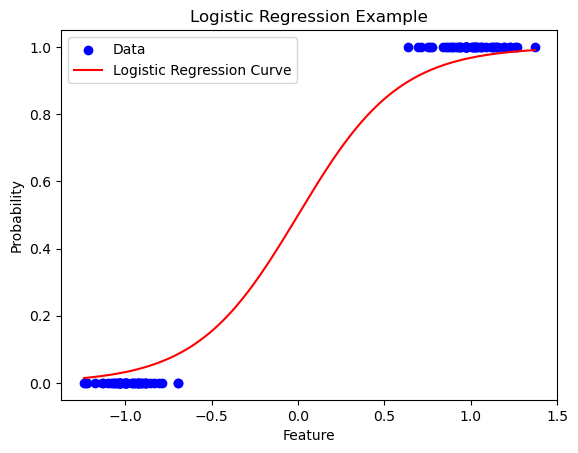

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0, 
    n_clusters_per_class=1,
    # random_state=42
)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities for visualization
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

# Visualize the data and learned model
plt.scatter(X, y, label="Data", color="blue")
plt.plot(x_range, y_prob, label="Logistic Regression Curve", color="red")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.title("Logistic Regression Example")
plt.legend()
plt.show()

### Noise

- Unless your problem is made-up, you will never be able to predict unseen data perfectly
- Noise is the random variation in the data which stops your predictions from being perfect
- Noise comes in two flavours:
    - The noise which you could get rid of if your model was better, called epistemic noise
    - The noise which no model of the data you have could capture, called aleatoric noise

‘Episteme’ – Ancient Greek for ‘knowledge’

Chaos theory in a nutshell: there isn’t enough data to make a perfect model

### Overfitting

- Overfitting is when a model gets so good at predicting noise in the training data that it can no longer accurately predict into the future
- This requires powerful models or very poor data
    - Linear/logistic regression only overfit on very poor (or very little) data
    - The models we are about to look at can get overfitted to noise in any data

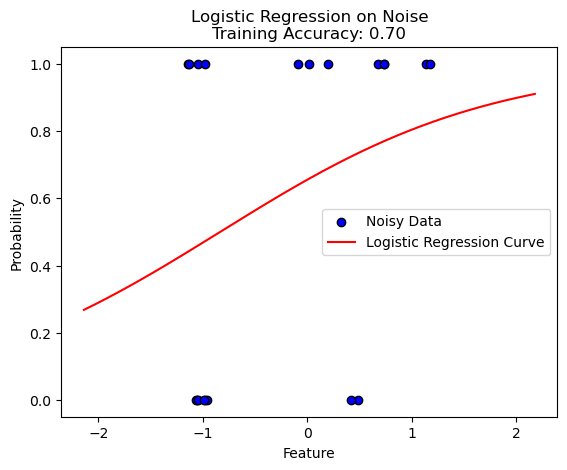

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate noisy data
X, y = make_classification(
    n_samples=20,  # Very few samples
    n_features=1,  # Single feature for simplicity
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.4,  # High noise: 40% of labels are randomly flipped
    random_state=42
)

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities for visualization
x_range = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

# Evaluate the model on training data (to highlight overfitting)
y_pred = model.predict(X)
train_accuracy = accuracy_score(y, y_pred)

# Visualize the data and learned model
plt.scatter(X, y, label="Noisy Data", color="blue", edgecolor="k")
plt.plot(x_range, y_prob, label="Logistic Regression Curve", color="red")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.title(f"Logistic Regression on Noise\nTraining Accuracy: {train_accuracy:.2f}")
plt.legend()
plt.show()

### Cross-validation

- To measure overfitting, we often keep roughly (not strictly) 20% of the training data in reserve (the validation data)
- As we make the model more complex, we regularly check how well it does on the validation data – when it starts getting worse, we know it is beginning to overfit
- To prevent bias from which 20% we used as validation data, we slice the data into 5 chunks, and train 5 times, using each chunk once (cross-validation)

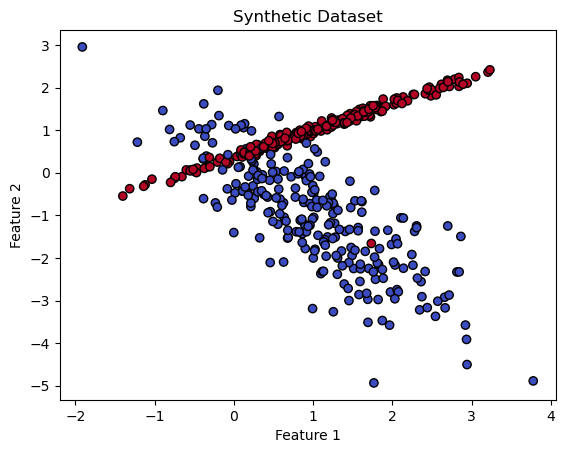

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    random_state=42, n_clusters_per_class=1
)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without cross-validation: {accuracy:.3f}")

Accuracy without cross-validation: 0.847


In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy with Cross-Validation: {np.mean(cv_scores):.3f}")

Cross-Validation Scores: [0.88 0.85 0.91 0.86 0.86]
Mean Accuracy with Cross-Validation: 0.872


### Decision trees

- We can draw a series of if/then statements which can let us decide answers based on questions about our data:
    - If your temperature is high, you are ill.
    - If your blood pressure and heart rate are high, and you are not exercising, you are unhealthy
- Answers may be categorical (healthy, unhealthy, ill) or continuous (size of life insurance premium)
- But we want the machine to learn these things on its own, rather than need us tell it



### Tree training

- At each step (epoch) tree ‘grows’ a layer using the training data
- Each layer splits the tree (and the data) into nodes
- Each node represents a decision about the data in it

For classification: <br>
At each layer, the tree splits the training samples into nodes by choosing a feature (column) and a threshold value so that the samples in each node will be as well-divided as possible

For regression: <br>
The samples are split so that their mean is as close to the true value as possible

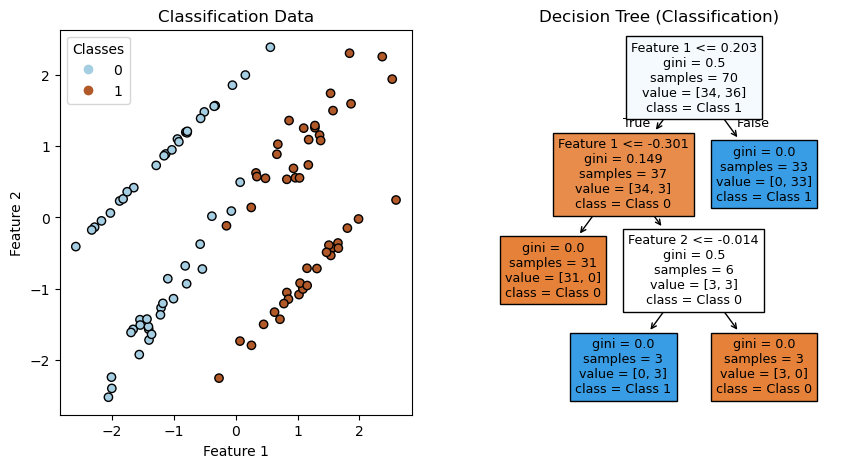

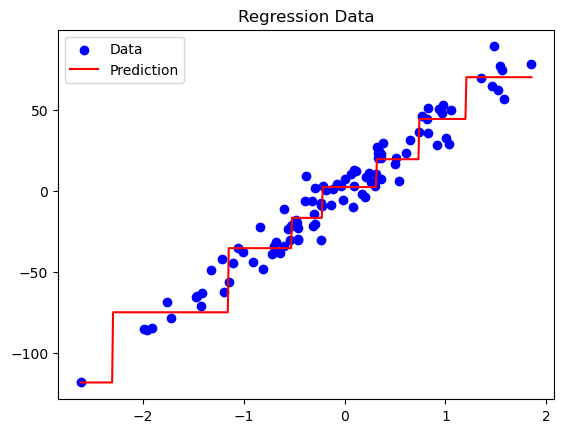

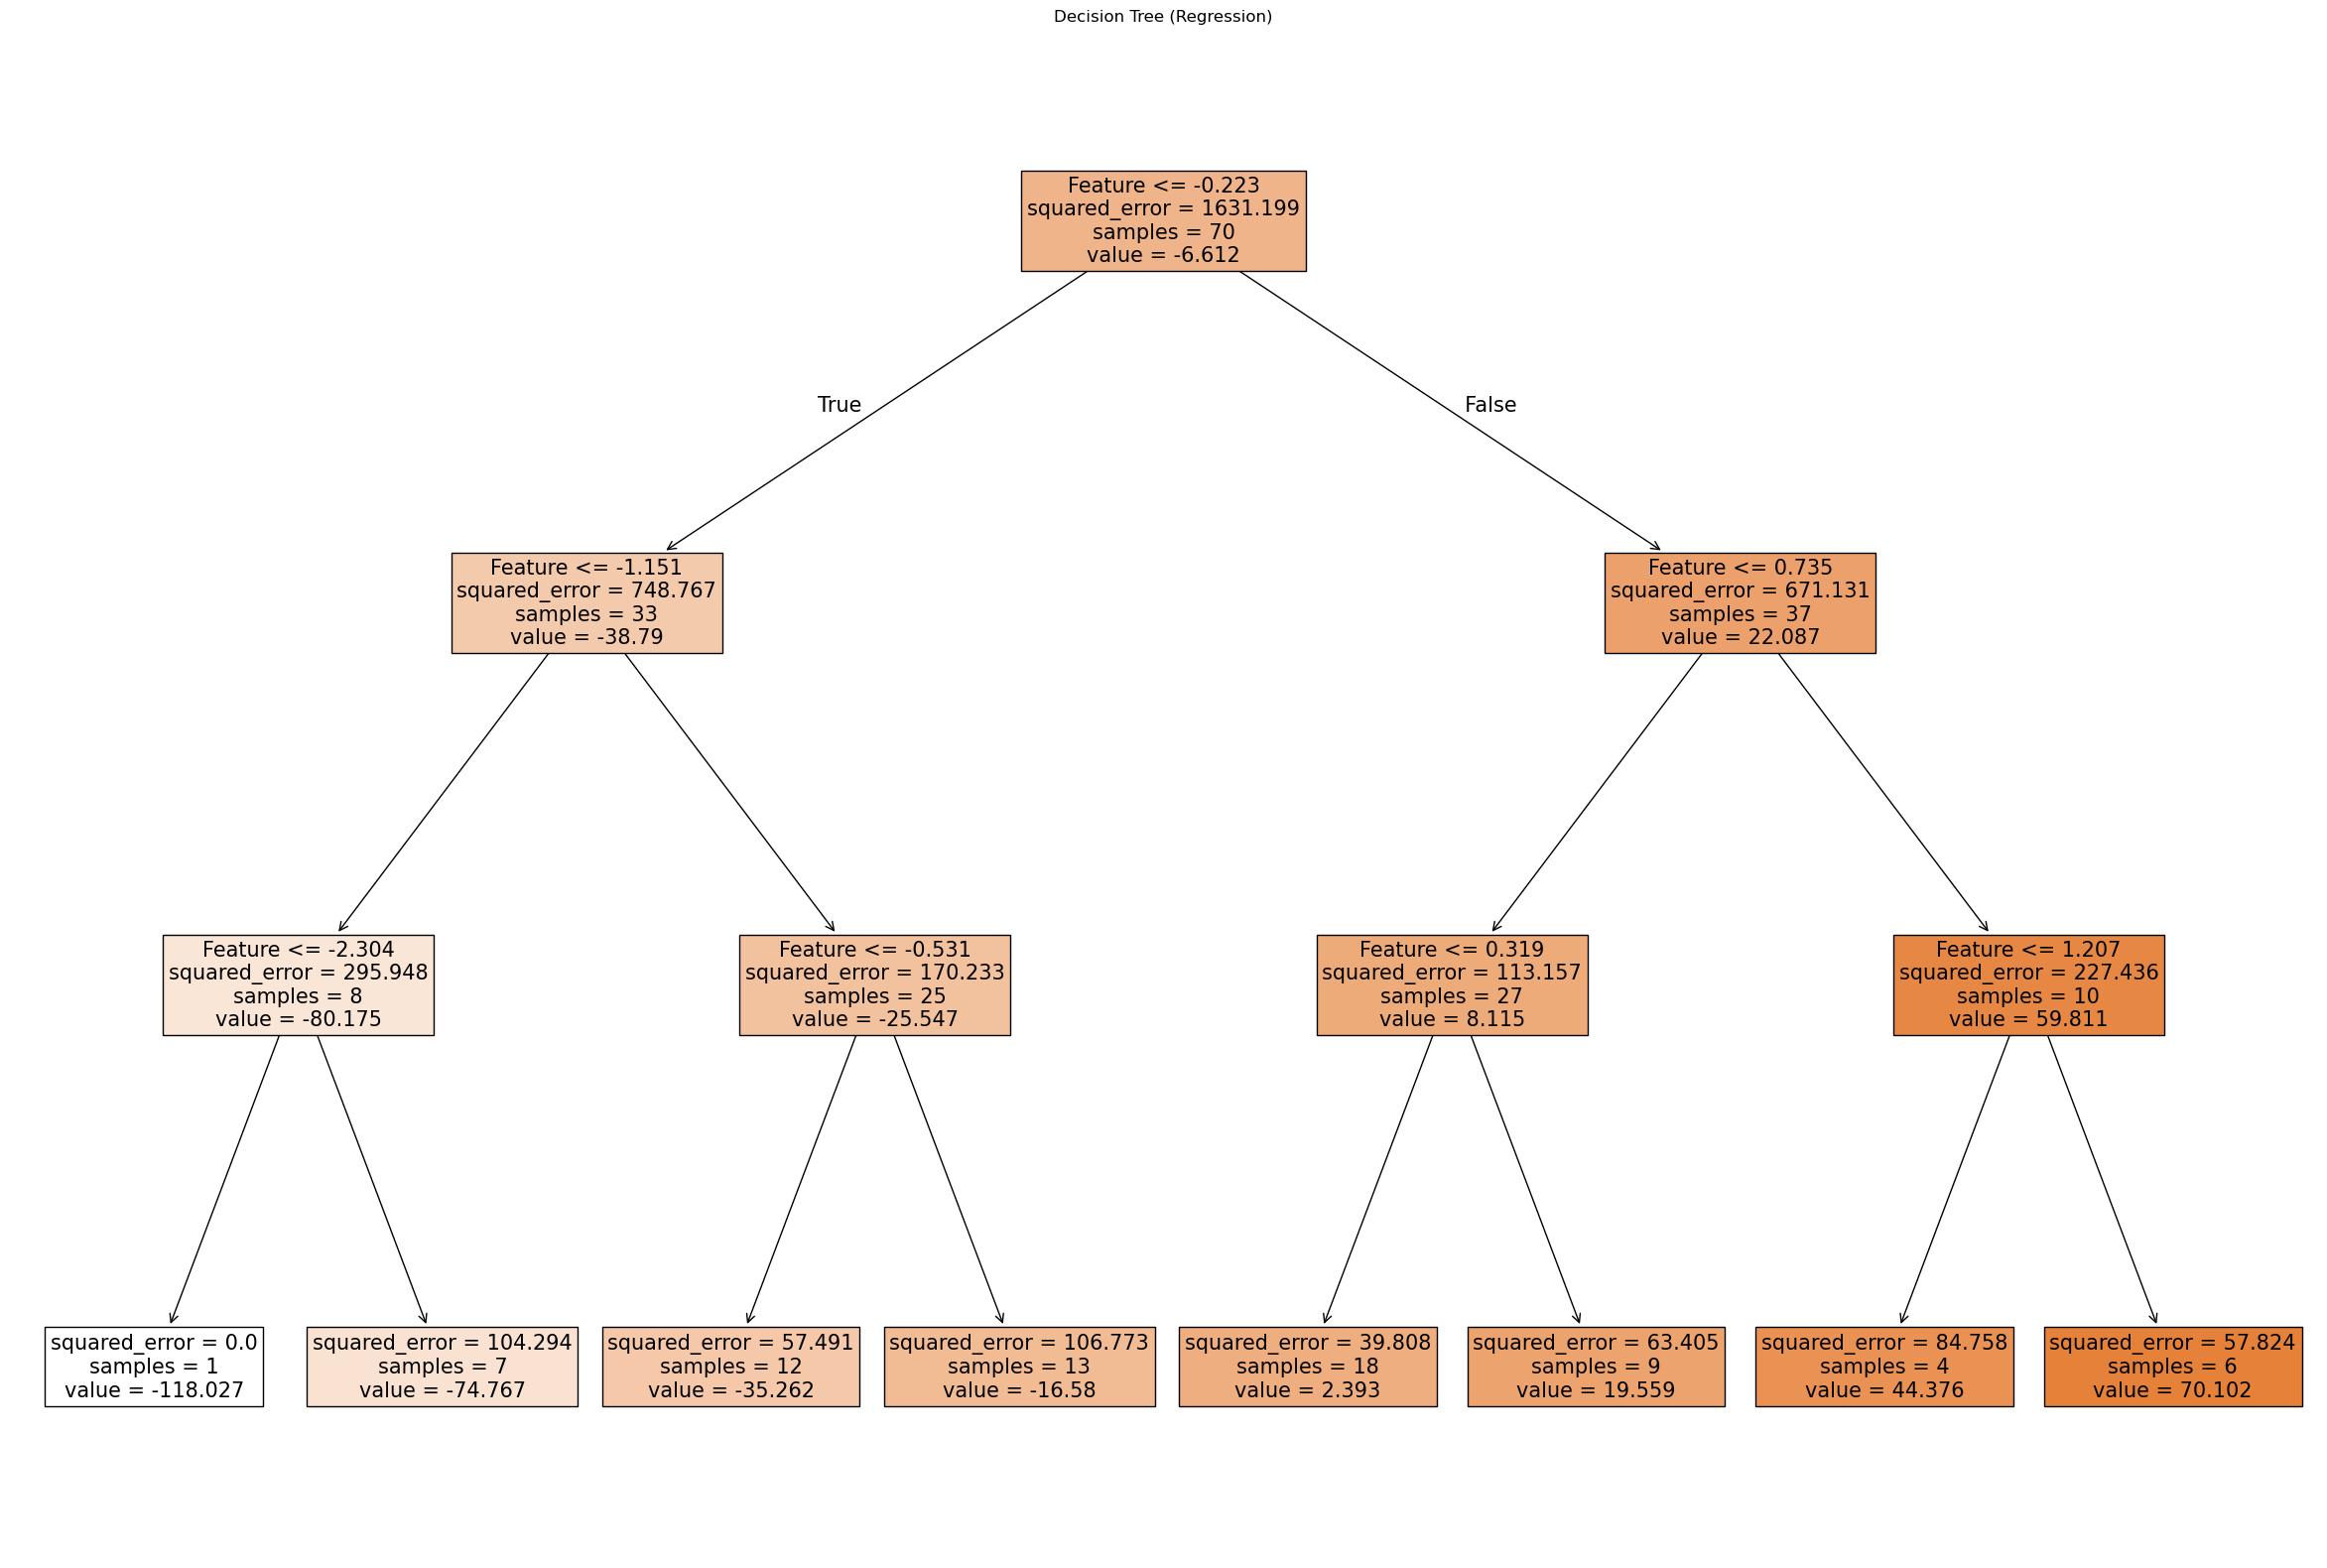

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

# Classification Task
# Generate synthetic classification data
X_class, y_class = make_classification(n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_c, y_train_c)

# Plot classification data and decision tree
plt.figure(figsize=(10, 5))
plt.subplot(121)
# Assuming X_class and y_class are already defined
scatter = plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap=plt.cm.Paired, edgecolor='k')
# Create legend handles and labels
legend_elements, legend_labels = scatter.legend_elements()
# Add the legend to the plot
plt.legend(legend_elements, legend_labels, title="Classes")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Classification Data")

plt.subplot(122)
plot_tree(clf, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree (Classification)")
plt.show()

# Regression Task
# Generate synthetic regression data
X_reg, y_reg = make_regression(n_features=1, noise=10.0, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train a decision tree regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train_r, y_train_r)

# Plot regression data and predictions
X_plot = np.linspace(X_reg.min(), X_reg.max(), 500).reshape(-1, 1)
y_plot = reg.predict(X_plot)

plt.figure()
# plt.subplot(121)
plt.scatter(X_reg, y_reg, color="blue", label="Data")
plt.plot(X_plot, y_plot, color="red", label="Prediction")
plt.title("Regression Data")
plt.legend()

plt.figure(figsize=(30, 20))
# plt.subplot(122)
plot_tree(reg, feature_names=["Feature"], filled=True, fontsize=15)
plt.title("Decision Tree (Regression)")
plt.show()

### (Random) Forests and Ensembles

- A forest is a collection of (different) trees.
- Trees are different because they are trained on different subsets of the data
    - This could be datapoints (rows) or features (columns) – “bootstrapping”
- We take the answer which the most trees agree on if we are classifying, or the average if we are doing regression (bagging)
- This ensemble (assembly, group) of models can be very accurate after a while
    - Just like asking a good group of friends!
    - The ensemble concept is applicable to most types of ML models

### Exercise 1

- Let’s do an exercise on the iris dataset!
- The code is written for you, run it and see how it does.
    - There is an example which overfits, and an example which does not.
- Then, change the parameters. Can you get better predictions? How?
- Repeat for the Boston Housing dataset!

#### Iris Dataset

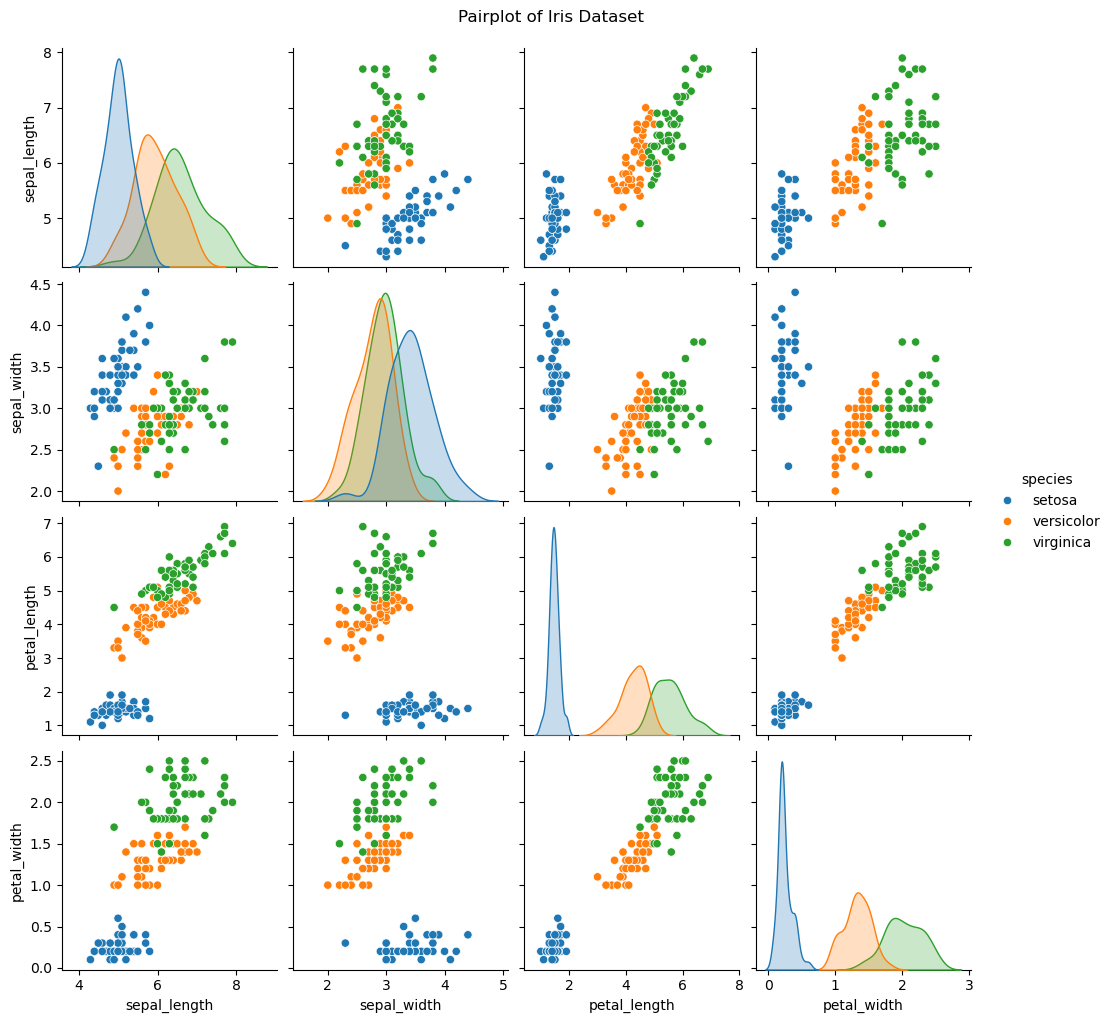

In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset from sklearn
iris = load_iris()
X = iris.data  # Features (flower measurements) as a numpy array
y = iris.target  # Labels (species) as a numpy array

# Visualize the data using a pairplot
iris_df = sns.load_dataset("iris")  # Load seaborn's version of Iris dataset for visualization
sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create overfit-prone Random Forest
overfit_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=30,          # Excessively deep trees
    min_samples_split=1.0,   # No minimum samples for splits
    min_samples_leaf=1,    # Leaves can contain single samples
    max_features=4,        # Use all features (no randomness)
    bootstrap=False,       # Use full dataset for each tree
    random_state=42
)

# Train and predict
overfit_rf.fit(X_train, y_train)
test_preds = overfit_rf.predict(X_test)

# Calculate scores
cv_scores = cross_val_score(overfit_rf, X_train, y_train, cv=5)
train_acc = cv_scores.mean()
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}")
print(f"Accuracy Gap: {train_acc - test_acc:.4f}")

Training Accuracy: 0.8743
 Testing Accuracy: 0.8600
Accuracy Gap: 0.0143


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create overfit-prone Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Train and predict
rf.fit(X_train, y_train)
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

# Calculate scores
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}")
print(f"Accuracy Gap: {train_acc - test_acc:.4f}")

Training Accuracy: 0.9829
 Testing Accuracy: 0.9533
Accuracy Gap: 0.0295


Observe that we _can_ learn the Iris dataset perfectly with a Random Forest! This is because they are inherently resistant to overfitting, and the dataset is relatively simple.

#### California Housing Dataset

In [11]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073

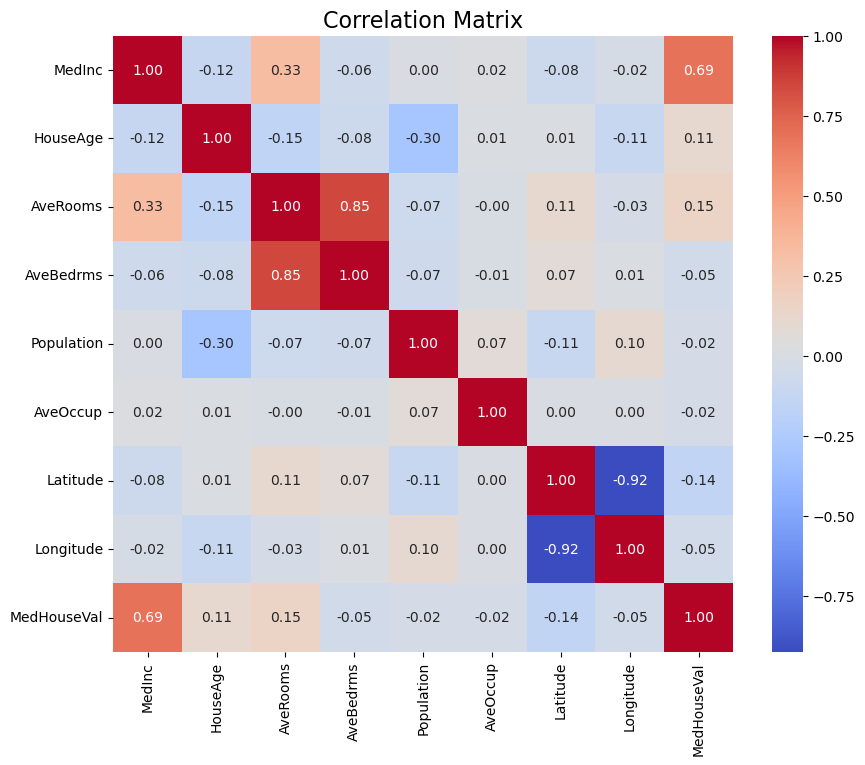

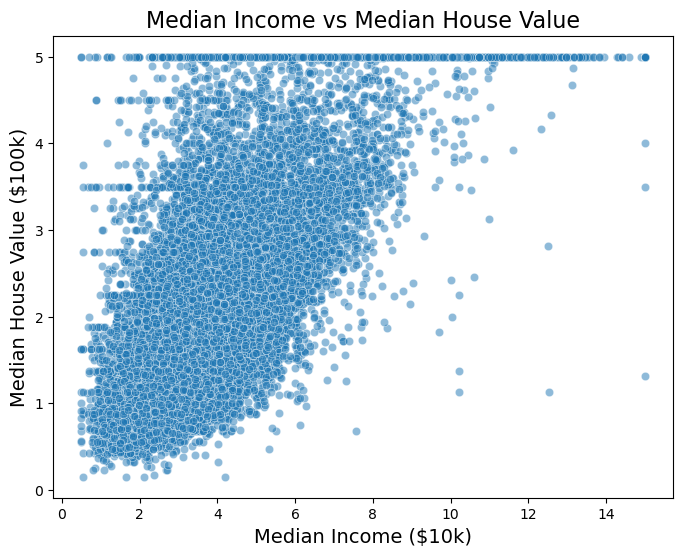

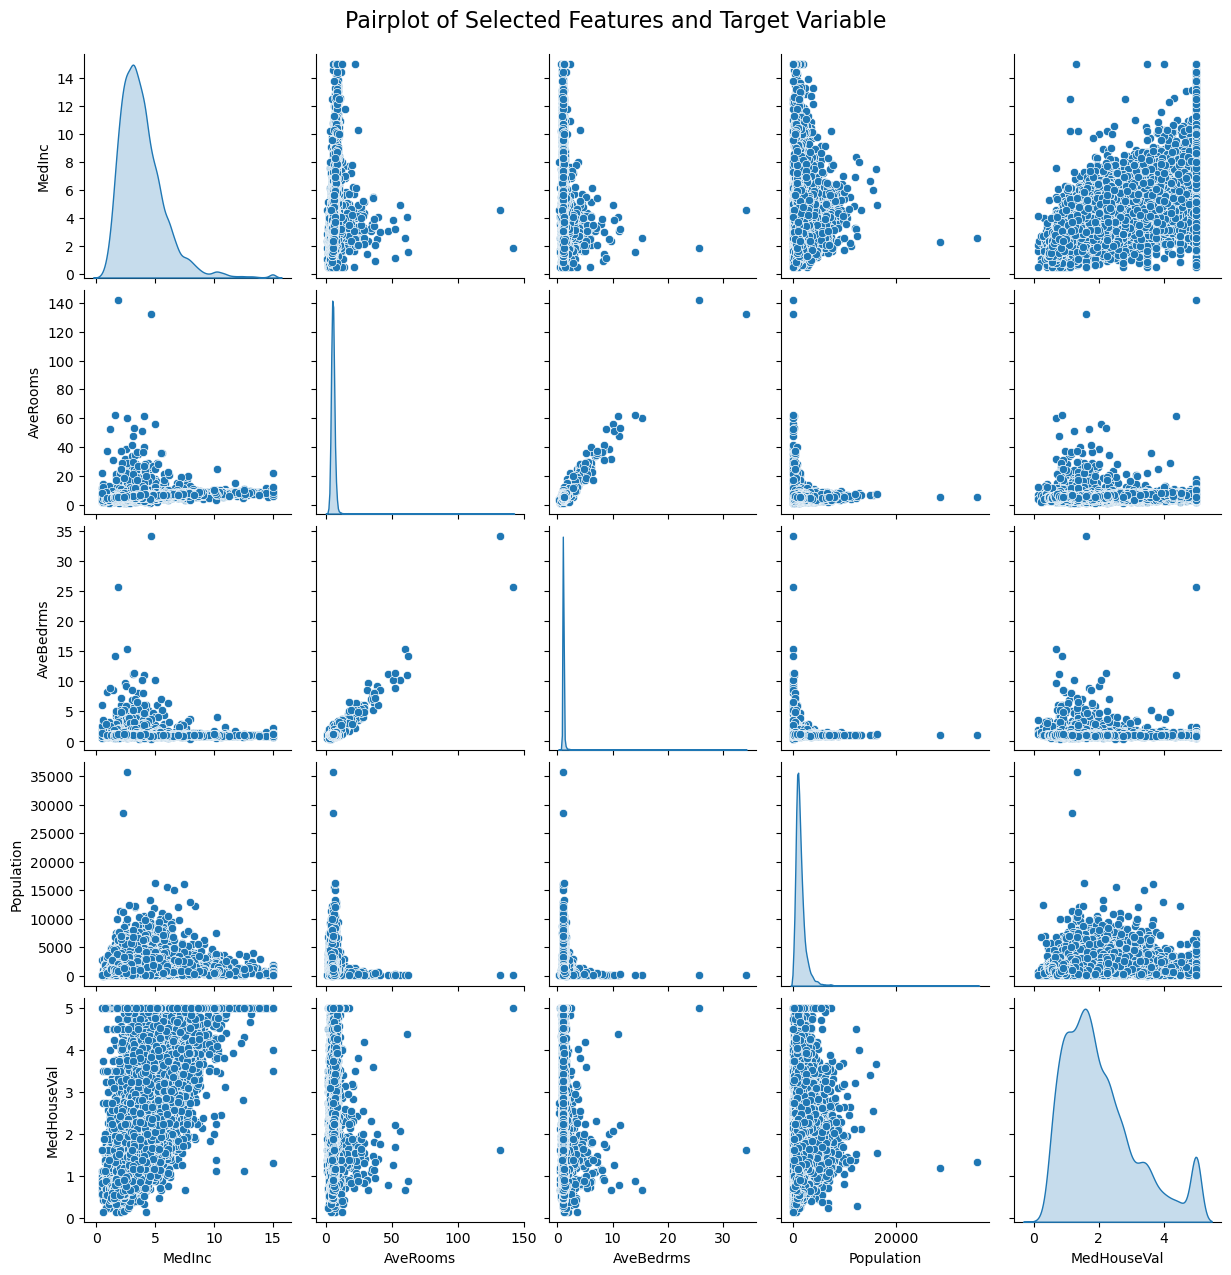

In [12]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

df = data.frame  # Convert to a DataFrame for easier visualization

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Visualize correlations between features and target variable
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Scatter plot: Median Income vs Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'], alpha=0.5)
plt.title('Median Income vs Median House Value', fontsize=16)
plt.xlabel('Median Income ($10k)', fontsize=14)
plt.ylabel('Median House Value ($100k)', fontsize=14)
plt.show()

# Pairplot to visualize relationships between features and target variable
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'MedHouseVal']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and Target Variable', y=1.02, fontsize=16)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = data.data  # Features
y = data.target  # Target variable (median house value)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.5053399773665033


### Support Vector Machines

- We draw some lines to divide up the “feature space”
- Sometimes the classes can’t be separated by straight lines
- We can also use “kernels” to change the shape of the feature space, which can let us draw straight lines
    - The kernel parameter – strength of this effect – is called gamma ($\gamma$)
- If we still can’t draw perfect boundaries (because the classes are not separable) we allow some misclassification
    - Parameter for controlling this is called C – higher value of C means less misclassification allowed

### Exercise 2

- We will use some toy datasets, and one synthetic one with a concrete interpretation.
- This time we use an SVM, run it and see how it does.
- Then, change the parameters. Can you get better predictions? How?

As an extension, if you like, try to apply an SVC to the Iris dataset on your own!

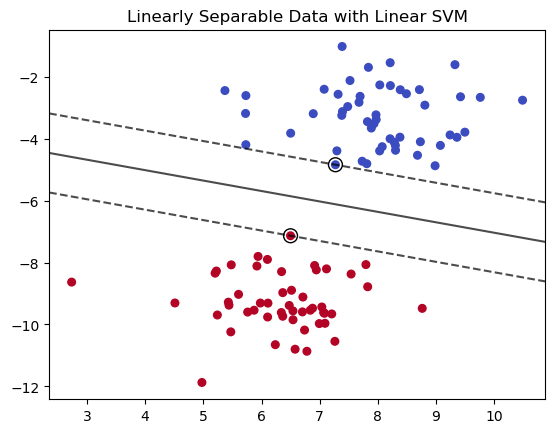

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate linearly separable data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train a linear SVM
clf = SVC(kernel='linear', C=1e6)  # High C for no misclassification
clf.fit(X, y)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid for decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("Linearly Separable Data with Linear SVM")
plt.show()

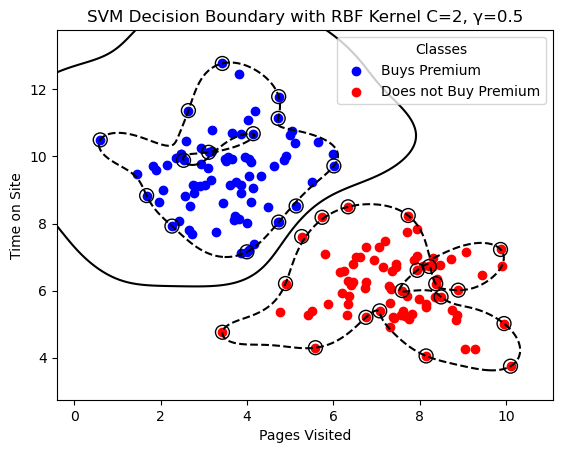

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Generate synthetic data (200 samples)
X, y = datasets.make_blobs(
    n_samples=200,
    centers=2,
    cluster_std=1.2,
    center_box=(0, 10),
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C = 2
gamma = 0.5
# Train RBF kernel SVM with regularization
clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

def plot_decision_boundary(clf, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict across grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], 
                linestyles=['--', '-', '--'], colors='black')
    
    # Scatter plot for data points
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Buys Premium')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Does not Buy Premium')
    
    # Highlight support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    
    # Add legend
    plt.legend(loc="upper right", title="Classes")
    plt.ylabel('Time on Site')
    plt.xlabel('Pages Visited')
    
    # Add title and show plot
    plt.title(title)

plot_decision_boundary(clf, X_train, y_train, 
                      f"SVM Decision Boundary with RBF Kernel C={C}, γ={gamma}")
plt.show()

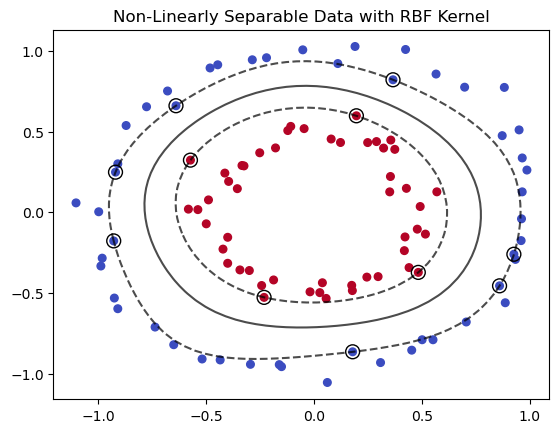

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate non-linearly separable data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05)

# Train an SVM with RBF kernel
clf = SVC(kernel='rbf', C=1e6)  # High C for no misclassification
clf.fit(X, y)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid for decision boundary
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("Non-Linearly Separable Data with RBF Kernel")
plt.show()

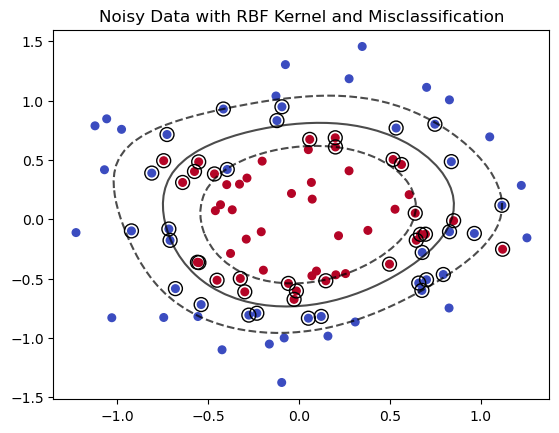

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate non-linearly separable data with noise
X, y = make_circles(n_samples=100, factor=0.5, noise=0.2)

# Train an SVM with RBF kernel and lower C for misclassification tolerance
clf = SVC(kernel='rbf', C=1)  # Lower C allows some misclassification
clf.fit(X, y)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid for decision boundary
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("Noisy Data with RBF Kernel and Misclassification")
plt.show()